<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Predict Credit Card Fraud

**SET THE WORKING DIRECTORY SO THAT WE DO NOT HAVE TO THINK ABOUT PATH PROBLEMS**



In [1]:
import os
os.getcwd()

'C:\\Users\\CTS\\Documents\\Ipython notebook\\Notebooks'

### 1. Problem Statement

Due to prevalent fraud in finance domain, it is imperative for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

### 2. Objective

Classify fraudulent transaction from non fraudulent transactions using machine learning algorithms.

### 3. Import all scientific and visualization packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

## visualization packages

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


### 4. Loading the datasets

In [4]:
credit_card_df = pd.read_csv('creditcard.csv')

In [5]:
credit_card_df.shape

(284807, 31)

In [7]:
# print the first 5 rows of data
credit_card_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### 4.1 Understand datatypes present in dataframe

In [8]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no missing values in this dataframe. So data imputation is **not** required.

### 5. Data Visualization

#### 5.1 Distribution of amount in credit card transactions

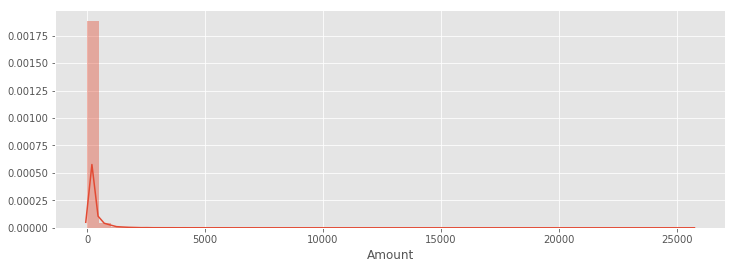

In [9]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.distplot(credit_card_df['Amount'])

The distribution is right skewed with very less transactions towards the higher amounts.

#### 5.2 Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.

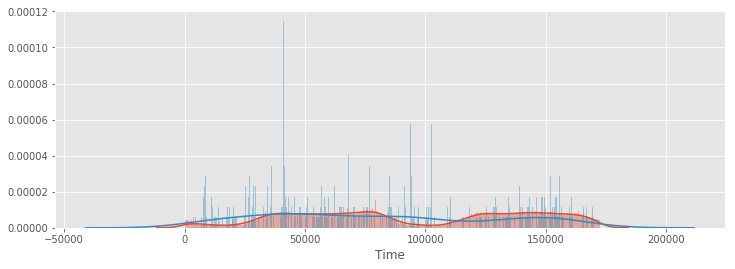

In [10]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")
sns.distplot(credit_card_df['Time'],kde=True,bins=480)
sns.distplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],kde=True,bins=480)


The time for fraudulent transactions is almost uniformly distributed with a certain level of **repetition or seasonality** after some interval of time.

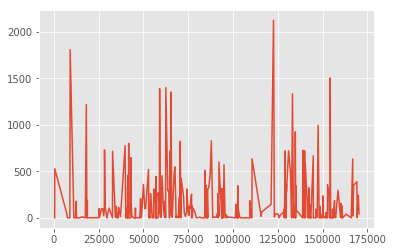

In [12]:
credit_card_df.loc[credit_card_df['Class'] == 1, 'Time']
plt.plot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],credit_card_df.loc[credit_card_df['Class'] == 1, 'Amount'])
plt.show()

#### 5.3 Distribution of V4 for fraudulent and non fraudulent transactions

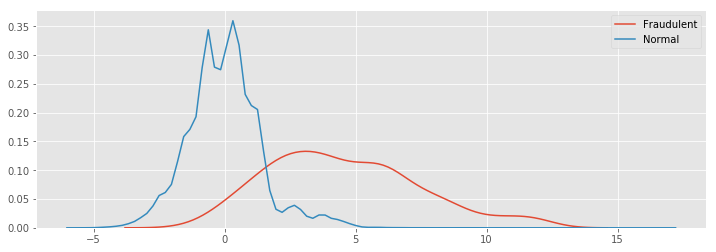

In [17]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")

sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'V4'],label='Fraudulent')
sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 0, 'V4'],label='Normal')


It is quite evident that fraudulent and normal transactions are almost separated through this graph with the help of V4 attribute.

#### 5.4 Scatter plot between time of transaction and amount of transaction

C:\Users\CTS\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<Figure size 1080x720 with 0 Axes>

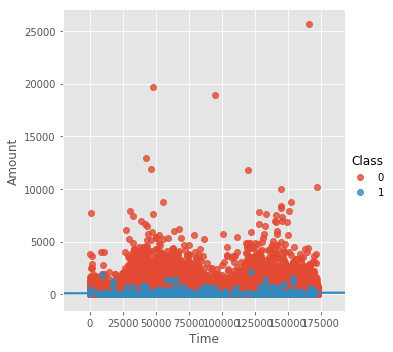

In [18]:
plt.figure(figsize=(15,10))
sns.lmplot('Time', # Horizontal axis
           'Amount', # Vertical axis
           data=credit_card_df, # Data source
           fit_reg=True, # Don't fix a regression line
           hue="Class", # Set color
        ) 


It is evident that Fraudulent transactions are mostly below an amount of 1000 and never more than that.

#### 5.5 Correlation Heatmap

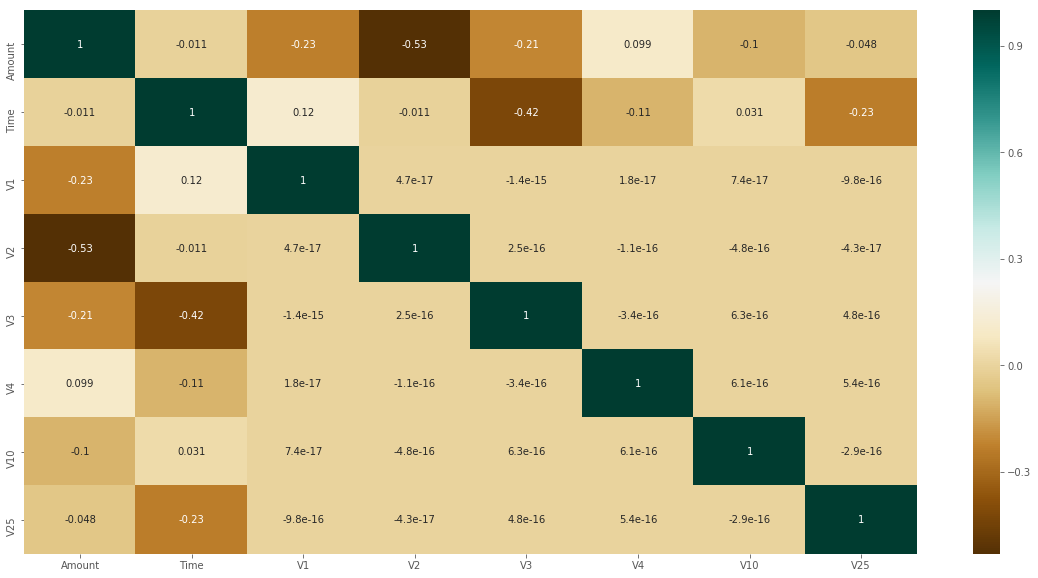

In [19]:
plt.figure(figsize=(20,10))
c = credit_card_df[['Amount','Time','V1','V2','V3','V4','V10','V25']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Amount is negatively correlated with V2
Time is negatively correlated with V3

### 6. Handle imbalanced data using SMOTE

#### 6.1 Prepare the data

In [21]:
X = credit_card_df.drop(['Class'],axis=1)

y = credit_card_df.Class

In [22]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
!pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_sample(X, y)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

In [27]:
X_train.shape

(380982, 30)

#### 6.2 Train a logistic regression model

In [28]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

C:\Users\CTS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.8)

In [30]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.9711854109822646


In [31]:
# examine the class distribution of the testing set
pd.Series(y_test).value_counts()

1    93873
0    93775
Name: Class, dtype: int64

In [32]:
# calculate null accuracy 
pd.Series(y_test).value_counts().head(1) / len(y_test)

1    0.500261
Name: Class, dtype: float64

Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.

In [33]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[91863  1912]
 [ 3495 90378]]


Here the false negatives are very high which means around 3739 are wrongly classifed as non-defaulters when in reality they are defaulters.

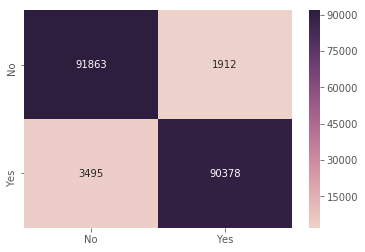

In [34]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [36]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

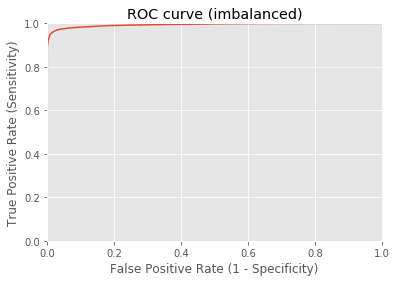

In [37]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [38]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.993510
